Fald i tyngdefelt med og uden luftmodstand
(Dette er en redigeret udgave af en eksamensopgave fra 2019)

En sten med massen m = 1.0 kg ”slippes” fra hvile 100 km over jordens overflade. Jordens
radius R_E = 6.37*10^6 m og dens masse m_E = 5.972*10^24 kg Tyngdekraften varierer med
højden ifølge Newtons gravitationslov: F_t =(G*m*m_E)/((h)^2) hvor G = 6.674*10^(-11) Nm^2/kg^2 er gravitationskonstanten, og 𝑟 er afstanden fra stenen til
Jordens centrum.

a) Skriv et SymPy script, der afbilder stenens potentielle energi som funktion af dens
højde, fra 100 km til 10 km over jorden. 

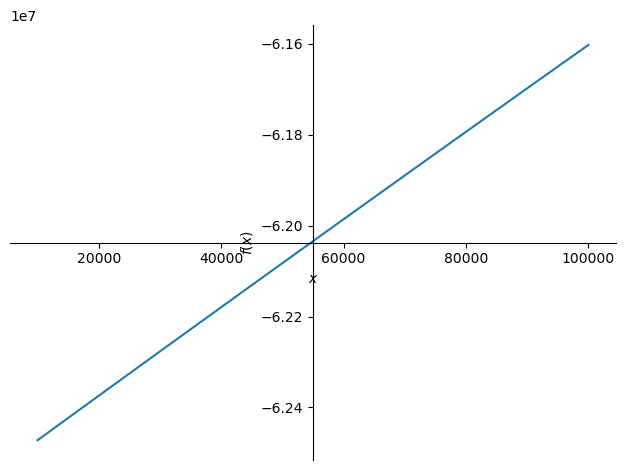

In [29]:
from sympy import *
x = Symbol ('x') #afstanden mellem jord og sten i meter
m = 1 #kg
G = 6.674*10**(-11) #Nm^2/kg^2
m_E = 5.972*10**24 #kg
R_E = 6.37*10**6 #m
h =R_E+x #Totale højde mellem sten og centrum af jorden.

U =-G*m*m_E/h
plot(U,(x,100000,10000))


b) Antag at stenen falder uden luftmodstand. Hvad er stenens fart 10 km over jordoverfladen? 

In [34]:
from sympy import *
x = Symbol ('x') #afstanden mellem jord og sten i meter
m = 1 #kg
G = 6.674*10**(-11) #Nm^2/kg^2
m_E = 5.972*10**24 #kg
R_E = 6.37*10**6 #m
h_1 = R_E+100000 #Totale højde mellem sten og centrum af jorden i position 1
h_2 = R_E+10000 #Totale højde mellem sten og centrum af jorden i position 2

U_1 = -(G*m*m_E)/((h_1))
U_2 = -(G*m*m_E)/((h_2))

#U_1 = U_2 + K_2
#K_2 = U_1 - U_2
#1/2*m*v**2=U_1-U_2
v=sqrt(2*(U_1-U_2)/m)

print("v=",v.evalf(5))

v= 1318.3


I det følgende ses på faldet de sidste 10 km. Det antages nu, at tyngdekraften er konstant (mg), men at der er luftmodstand i de nederste 10 km af atmosfæren, som giver en opadrettet
kraft af størrelsen Dv^2, hvor 𝑣 er legemets fart og konstanten 
𝐷= 1,3*10^-3 kg/m.

c) Vis, at dv/dt=Av^2+C. Hvordan er konstanterne 𝐴 og 𝐶 givet? 

In [26]:
#m*a=m*g - Dv^2
#m*dv/dt=m*g - Dv^2
#omskrives for dv/dt
#dv/dt=g-D/m*v^2
#Dette sammenlignes med dv/dt=Av^2+C
#A=-D/m
#C=g
#Dette løses numerisk
from sympy import *
D=1.3*10**-3 #kg/m
m = 1.0 #kg
g = 9.81 #m/s^2
A=-D/m
C=g
print ("C=",C, "m/s^2")
A_2_decimal = format(A, '.2g')  # 2 betydende cifre
print("A med 2 betydende cifre:", A_2_decimal)

C= 9.81 m/s^2
A med 2 betydende cifre: -0.0013


Differentialligningen i c) er svær at løse, da den ukendte funktion v(t) indgår kvadratisk på højre side og ikke bare kan integreres over tid. I stedet kan man opfatte tiden 𝑡 som funktion af 𝑣, og notere at forholdet mellem hastighedsændring og tidsskridt, 𝑑𝑣 og 𝑑𝑡, kan byttes om, så man får en ligning for dt/dv = 1/Av^2+C. På højre side står nu en eksplicit angivet funktion af 𝑣,som vi kan integrere på sædvanlig vis. Dette trick kaldes ”løsning af differentialligning ved kvadratur” og kan ofte benyttes i fysikproblemer.

d) Skriv et SymPy script, der integrerer 1/Av^2+C mht. 𝑣 og angiver 𝑡 som funktion af 𝑣 for den faldende sten. Skriv svaret, idet du sikrer dig at de rette startværdier er opfyldt. Overvej at det ikke er et matematisk problem at integrere over 𝑣 fra en høj til en lavere værdi. 

In [17]:
from sympy import *
t, v, C = symbols('t, v, C')

g = 9.81  # m/s^2, tyngdeacceleration
D = 1.3 * 10**(-2)  # kg/m, luftmodstandskoefficient
m = 1.0  # kg, masse af stenen

dt_dv = 1/(g-D/m*v**2)

t_integral = integrate(dt_dv, v)

initial_condition = solve(t_integral.subs(v, 0) + C, C)[0]

t_v = t_integral + initial_condition

print(t_v)

-1.40011537426045*log(1.0*v - 27.4702636429901) + 1.40011537426045*log(1.0*v + 27.4702636429901) + 4.39859217395475*I



Hvis du havde bedt SymPy om at løse differentialligningen ville den have gjort det samme og netop angivet 𝑡 som funktion af 𝑣, i stedet for det du bad om. 

Benyt SymPy til at lave et plot af t(v) og til at angive til hvilket tidspunkt stenen har opnået en fart på 708 m/s og 374 m/s? Hvis b) ikke er løst, kan du antage en fart på 1300 m/s til t = 0. I besvarelse skrives såvel de anvendte SymPy kommandoer som de numeriske resultater for tiderne. 

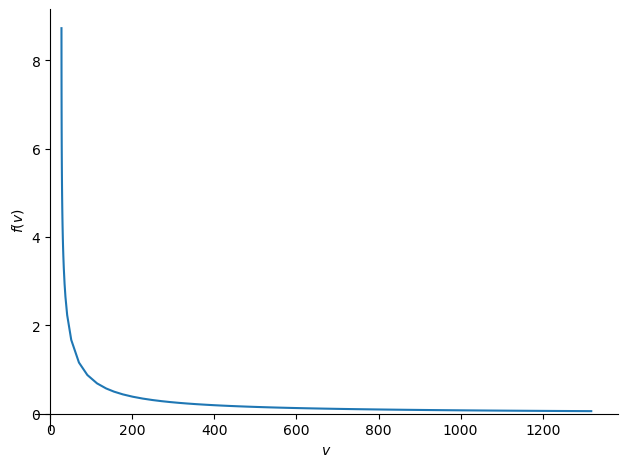

Tiden for v = 708 m/s er 0.109 s
Tiden for v = 374 m/s er 0.206 s


In [33]:
from sympy import *
t, v = symbols('t, v')
g = 9.81  # m/s^2, tyngdeacceleration
D = 1.3 * 10**(-2)  # kg/m, luftmodstandskoefficient
m = 1.0  # kg, masse af stenen

dt_dv = 1 / (g - D/m * v**2)
t_integral = integrate(dt_dv, v)

plot(t_integral, (v, 0, 1318.3))

t_708 = t_integral.subs(v, 708).evalf(3)
t_374 = t_integral.subs(v, 374).evalf(3)

print("Tiden for v = 708 m/s er", t_708, "s")
print(f"Tiden for v = 374 m/s er", t_374, "s")
